## This is Capstone project Notebook
This notebook will mainly focus on Capstone project.

In [611]:
import pandas as pd
import numpy as np
print ("Hello Capstone Project Course")

Hello Capstone Project Course


In [612]:
header = []

In [613]:
with open('communities.names','r') as name:
    lines = name.readlines()
    for line in lines:
        if "@attribute" in line:
            header.append(line.split(' ')[1])
crime_data = pd.read_csv("communities.data",names = header, header = None)

print (len(header))
crime_data.shape

128


(1994, 128)

In [614]:
crime_data.loc[crime_data.community=='?',]
print ("1")

1


In [615]:
header2=[]
with open('unnormalizedName','r') as name:
    lines = name.readlines()
    for line in lines:
        if "--" in line:
            headerprefix = line.split(':')[0]
            header2.append(headerprefix.split(' ')[1])
crime_data_with_state = pd.read_csv("CommViolPredUnnormalizedData.txt",names = header2, header = None)

In [616]:
crime_data_with_state.head()
crime_data_with_state.shape

(2215, 147)

In [617]:
from geopy.geocoders import Nominatim
#address = 'Berkeley Heights, NJ'
#geolocator = Nominatim(user_agent="ny_explorer")
#location = geolocator.geocode(address)

In [618]:
def findindex(x):
    if x.find('town')>0:
        return x.find('town')
    elif x.find('city')>0:
        return x.find('city')
    else:
        return len(x)

In [619]:
crime_data_with_state['communityname_formatted']=crime_data_with_state['communityname'].apply(lambda x: x[:findindex(x)])

In [620]:
def getstate(crime_data_with_state,x):
    if len(crime_data_with_state.loc[crime_data_with_state.communityname_formatted==x,'state'])>0:
        #print (crime_data_with_state.loc[crime_data_with_state.communityname_formatted==x,'state'])
        serise = crime_data_with_state.loc[crime_data_with_state.communityname_formatted==x,'state'].reset_index()
        #print()
        return serise.iloc[0,1]
    else:
        print (x)
        return ''
    
crime_data_with_state['address'] = crime_data_with_state['communityname_formatted'].apply(lambda x: '{}, {}'.format(x,getstate(crime_data_with_state,x)))

In [621]:
crime_data_with_state.head()

,communityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop,communityname_formatted,address
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,138,1132.08,16,131.26,2,16.41,41.02,1394.59,BerkeleyHeights,"BerkeleyHeights, NJ"
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,376,1598.78,26,110.55,1,4.25,127.56,1955.95,Marple,"Marple, PA"
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,...,1797,4972.19,136,376.3,22,60.87,218.59,6167.51,Tigard,"Tigard, OR"
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,716,4142.56,47,271.93,?,?,306.64,?,Gloversville,"Gloversville, NY"
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,1060,8490.87,91,728.93,5,40.05,?,9988.79,Bemidji,"Bemidji, MN"


In [622]:
def getlocation(address):
    geolocator = Nominatim(user_agent="ny_explorer")
    g = geolocator.geocode(address)
    print (g)
    return g
addresslist= crime_data_with_state['communityname_formatted'].values.tolist()
count = 0
locationlist = []
#get location will have timeout issue so get it every 100 address

#for address in addresslist:
#    getlocation(address)
#    count = count +1
#    print (count)

In [623]:
crime_data

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
5,6,?,?,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1.00,...,0.01,0.58,0.10,?,?,?,?,0.00,?,0.14
6,44,7,41500,Lincolntown,1,0.01,0.39,0.00,0.98,0.06,...,0.05,0.08,0.06,?,?,?,?,0.00,?,0.03
7,6,?,?,Selmacity,1,0.01,0.74,0.03,0.46,0.20,...,0.01,0.33,0.00,?,?,?,?,0.00,?,0.55
8,21,?,?,Hendersoncity,1,0.03,0.34,0.20,0.84,0.02,...,0.04,0.17,0.04,?,?,?,?,0.00,?,0.53
9,29,?,?,Claytoncity,1,0.01,0.40,0.06,0.87,0.30,...,0.00,0.47,0.11,?,?,?,?,0.00,?,0.15


In [624]:
state = crime_data_with_state[['communityname','address']]

In [625]:
crime_data.drop(['state','county','community'], axis=1,inplace = True)
crime_merged = crime_data.merge(state,how = 'left',on='communityname')

In [626]:
crime_merged = crime_merged.drop_duplicates()

In [627]:
crime_merged.reset_index(inplace=True)

In [628]:
crime_merged.head(5)

,index,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,...,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop,address
0,0,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,...,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20,"Lakewood, OH"
1,3,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,...,0.12,0.45,?,?,?,?,0.00,?,0.67,"Tukwila, WA"
2,4,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,...,0.21,0.02,?,?,?,?,0.00,?,0.43,"Aberdeen, WA"
3,5,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,...,0.39,0.28,?,?,?,?,0.00,?,0.12,"Willingboro, NJ"
4,6,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,...,0.09,0.02,?,?,?,?,0.00,?,0.03,"Bethlehem, PA"


In [629]:
crime_merged.drop(['index'],axis = 1, inplace = True)

In [630]:
crime_merged.head(5)

,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop,address
0,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20,"Lakewood, OH"
1,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.12,0.45,?,?,?,?,0.00,?,0.67,"Tukwila, WA"
2,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.21,0.02,?,?,?,?,0.00,?,0.43,"Aberdeen, WA"
3,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.39,0.28,?,?,?,?,0.00,?,0.12,"Willingboro, NJ"
4,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.09,0.02,?,?,?,?,0.00,?,0.03,"Bethlehem, PA"


In [631]:
#clean data
crime_cleaned = crime_merged.replace('?',np.NaN)
isnull = crime_cleaned.isnull().any()
isnull[isnull].size

23

In [632]:
crime_cleaned = crime_cleaned.dropna(axis=1)
crime_cleaned.shape

(1994, 103)

In [633]:
#exam correclation
corr= crime_cleaned.corr().abs()
feature_selected = corr.loc[corr.ViolentCrimesPerPop>0.5, 'ViolentCrimesPerPop'].index.to_list()

In [634]:
#filter out unrealted features
print(feature_selected)
print(len(feature_selected))
crime_selected = crime_cleaned.loc[:,feature_selected]


['racepctblack', 'racePctWhite', 'pctWInvInc', 'pctWPubAsst', 'PctPopUnderPov', 'PctUnemployed', 'MalePctDivorce', 'FemalePctDiv', 'TotalPctDiv', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctIlleg', 'PctPersOwnOccup', 'ViolentCrimesPerPop']
16


In [635]:
#get X 
feature_selected.remove('ViolentCrimesPerPop')

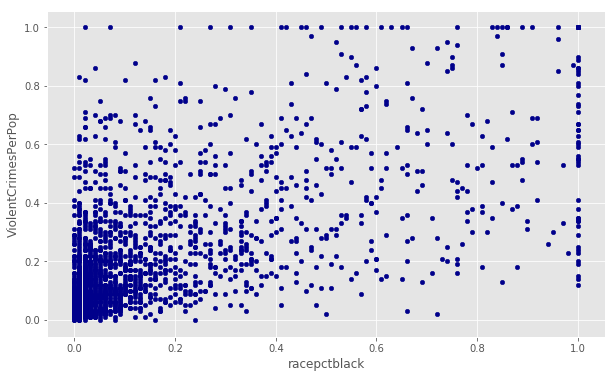

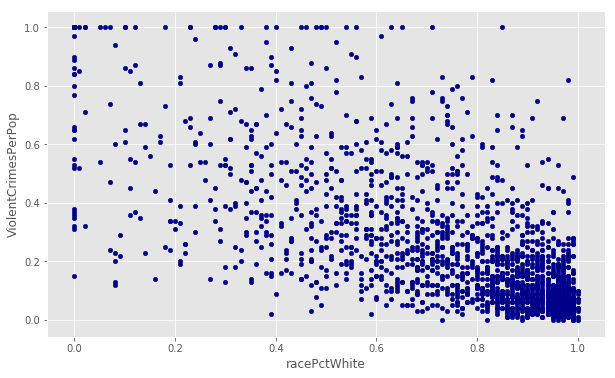

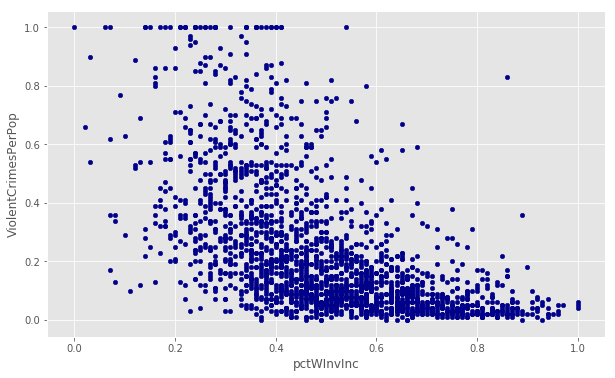

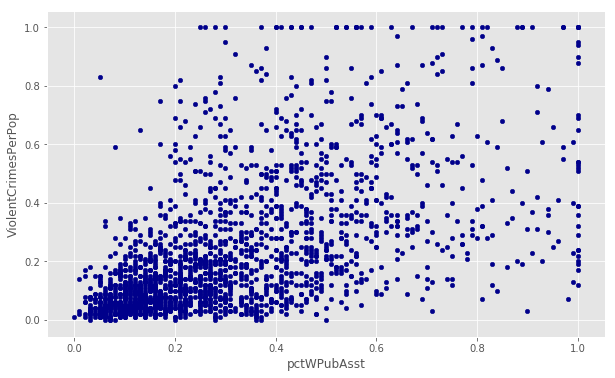

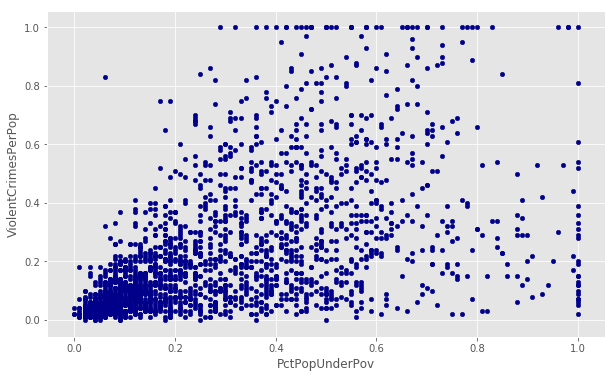

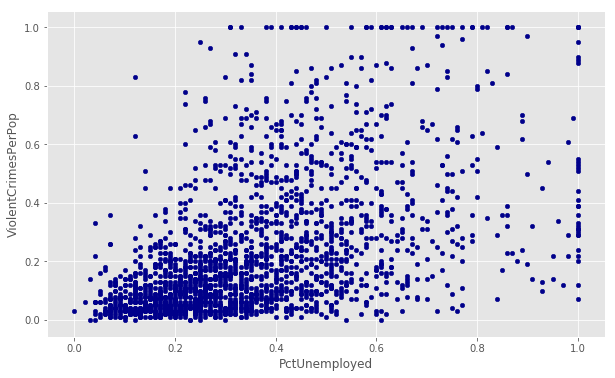

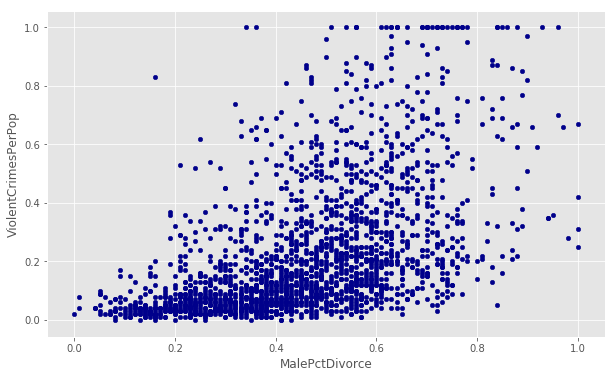

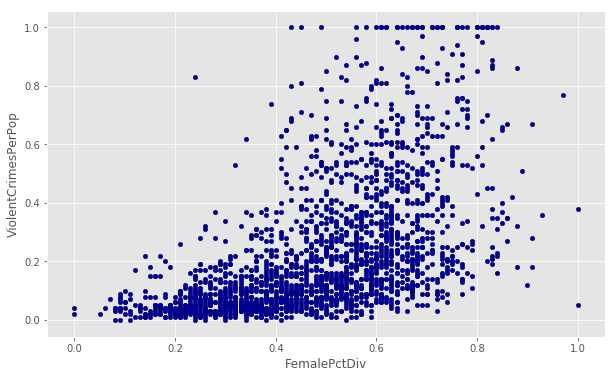

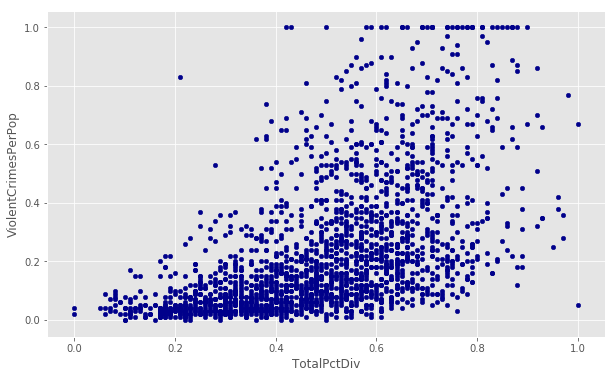

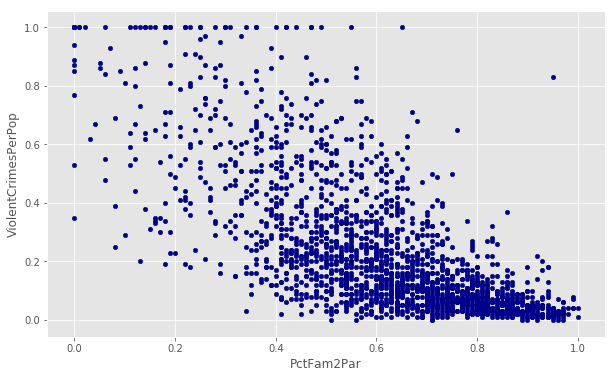

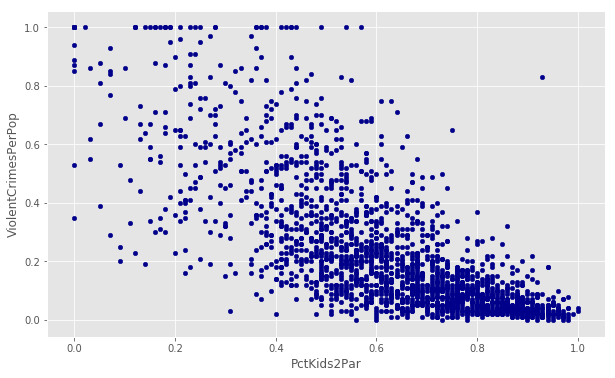

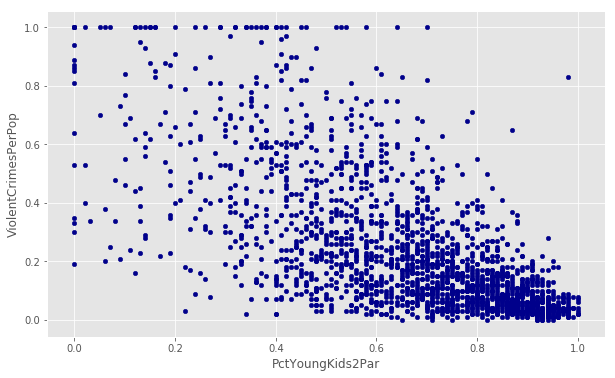

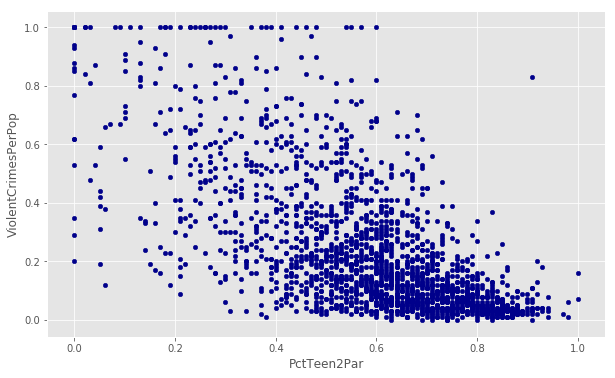

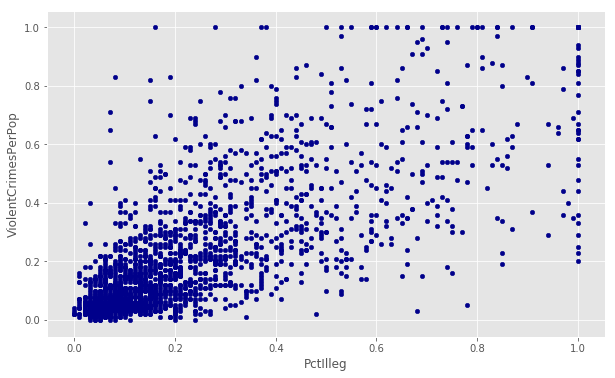

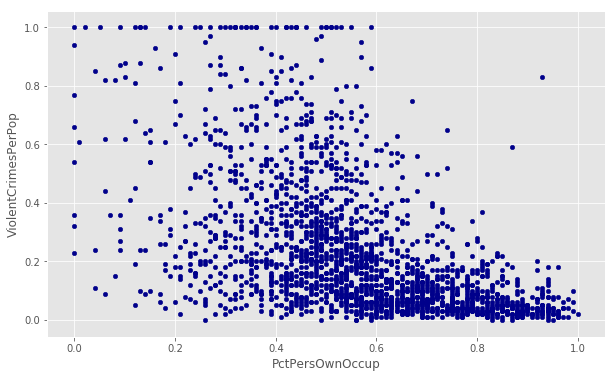

In [636]:
crime_selected.head()
#exam each feature distribution and relationship with target value
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')
for feature in feature_selected:
    crime_selected.plot(kind='scatter', x=feature, y='ViolentCrimesPerPop', figsize=(10, 6), color='darkblue')

In [637]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
import xgboost as xgb

rng = np.random.RandomState(31337)

y = np.asarray(crime_selected['ViolentCrimesPerPop'])
X = np.asarray(crime_selected[feature_selected])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=rng)
#print("Parameter optimization")
xgb_model = xgb.XGBRegressor(objective='reg:gamma')
clf = GridSearchCV(xgb_model,{'max_depth': [1,2,3,4,5,6,7,8,9,10],'n_estimators': [50,100,150,200]}, verbose=1)
clf.fit(X_train,y_train)
print(clf.best_score_)
print(clf.best_params_)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 40 candidates, totalling 120 fits
0.6305254296771795
{'max_depth': 2, 'n_estimators': 100}


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   20.2s finished


In [638]:
#result is not good enough, try to see predict importance of features
from sklearn.metrics import r2_score
best_model = xgb.XGBRegressor(max_depth= 2,learning_rate= 0.1,n_estimators = 100,objective='reg:gamma')
best_model.fit(X_train,y_train)
yhat = best_model.predict(X_test)
print("R2-score: %.2f" % r2_score(yhat , y_test) )

R2-score: 0.32


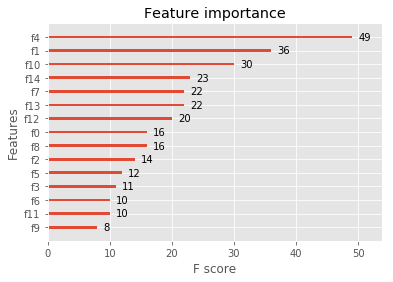

In [639]:
from xgboost import plot_importance
plot_importance(best_model)

In [640]:
print(best_model.feature_importances_)

[0.02715556 0.1113912  0.04502543 0.00440315 0.01260397 0.00919228
 0.01027178 0.0436142  0.02872664 0.01822324 0.56400174 0.01292376
 0.00993452 0.09509987 0.00743258]


In [641]:
#include all feature in original dataset to view feature importance
all_features = crime_cleaned.columns.to_list()

In [642]:
all_features.remove('communityname')
all_features.remove('address')
all_features.remove('fold')
all_features.remove('ViolentCrimesPerPop')

In [643]:
crime_cleaned
y = np.asarray(crime_cleaned['ViolentCrimesPerPop'])
X = np.asarray(crime_cleaned[all_features])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=rng)
#print("Parameter optimization")
xgb_model = xgb.XGBRegressor(objective='reg:gamma')
clf = GridSearchCV(xgb_model,{'max_depth': [1,2,3,4,5,6,7,8,9,10],'n_estimators': [50,100,150,200]}, verbose=1)
clf.fit(X_train,y_train)
print(clf.best_score_)
print(clf.best_params_)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  1.7min finished


0.6264948438151129
{'max_depth': 3, 'n_estimators': 100}


In [644]:
best_model = xgb.XGBRegressor(max_depth= 3,learning_rate= 0.1,n_estimators = 100,objective='reg:gamma')
best_model.fit(X_train,y_train)
yhat = best_model.predict(X_test)
print("R2-score: %.2f" % r2_score(yhat , y_test) )

R2-score: 0.40


In [645]:
importance = best_model.feature_importances_

In [646]:
feature_df = pd.DataFrame({'feature':all_features,'importance':importance})


In [647]:
feature_df_sort = feature_df.sort_values(by = ['importance'],ascending=False).reset_index()
feature_df_sort.drop(['index'], axis=1,inplace=True)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


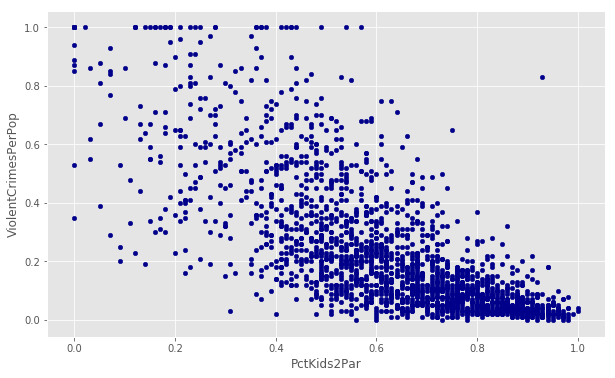

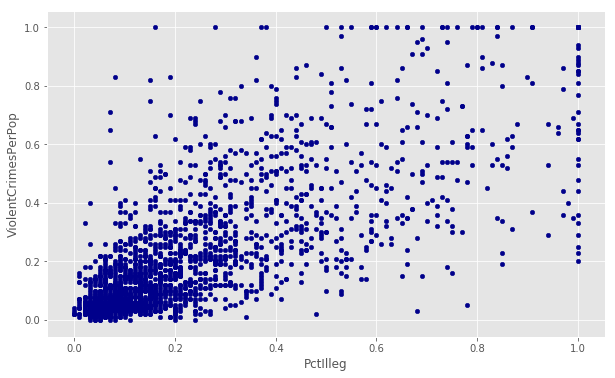

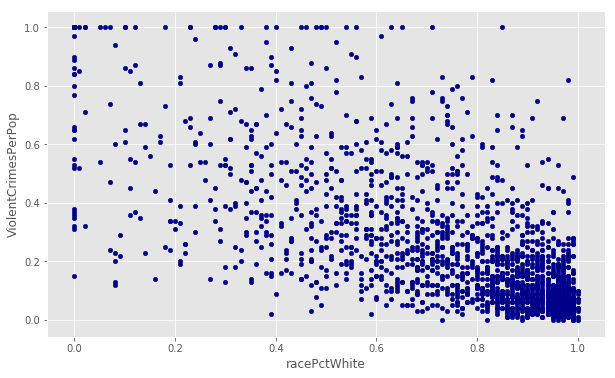

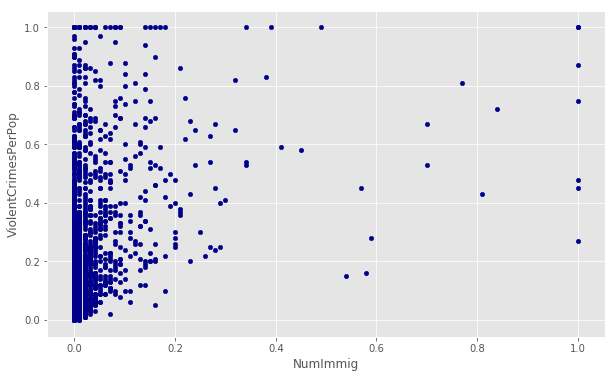

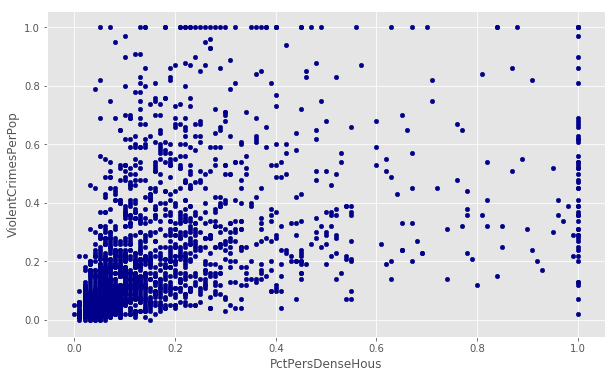

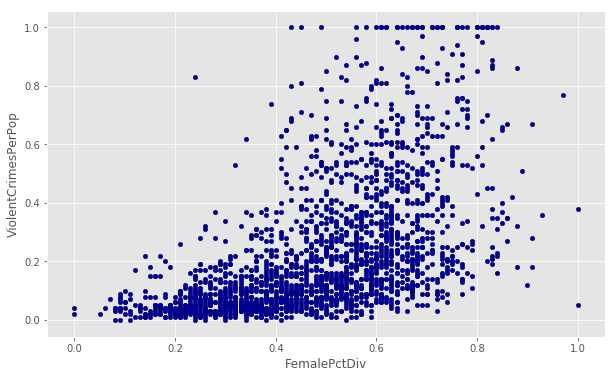

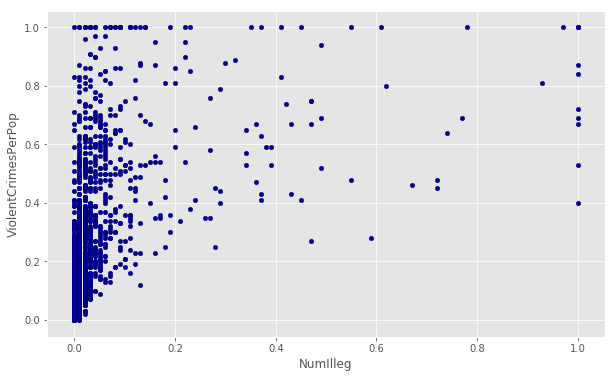

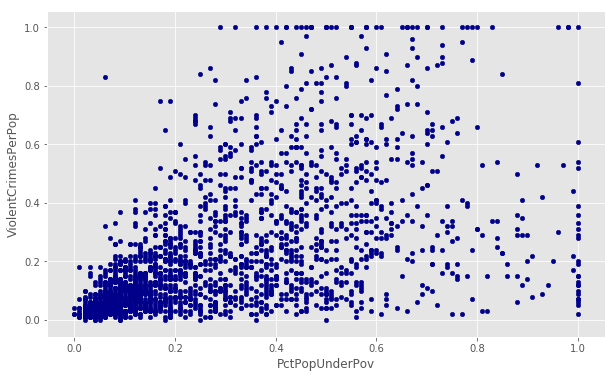

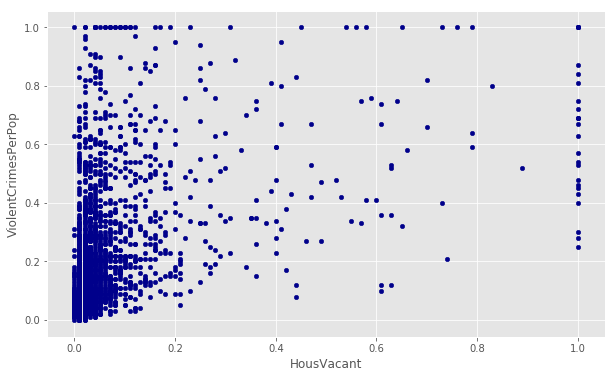

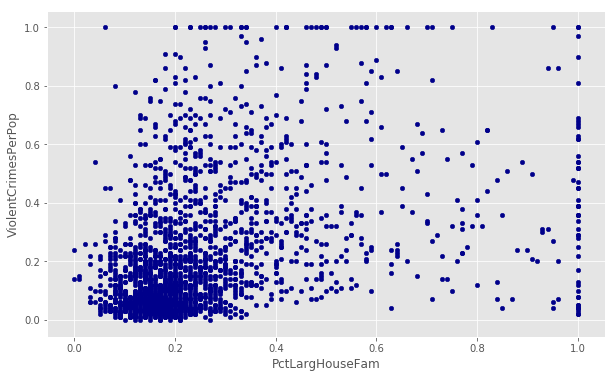

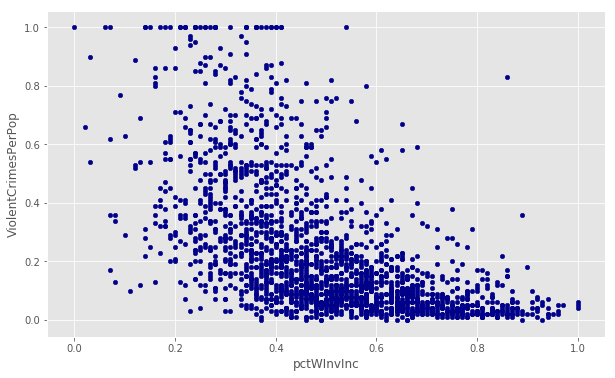

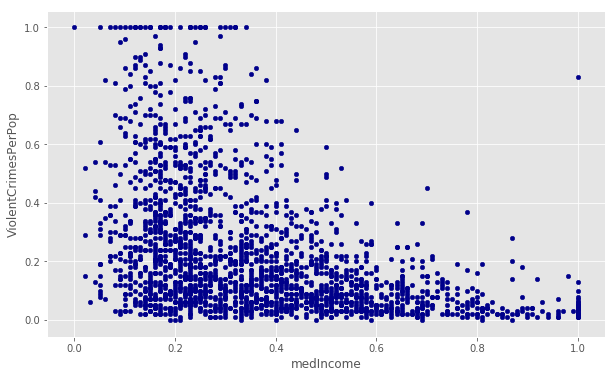

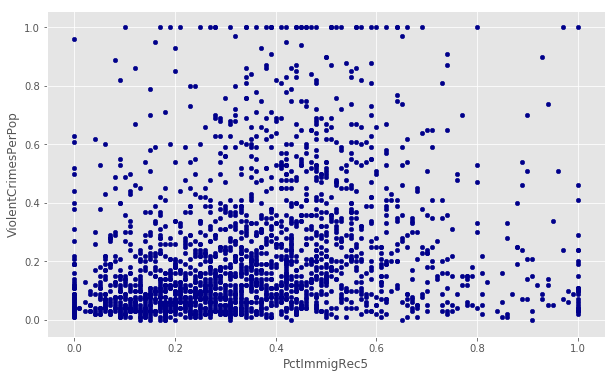

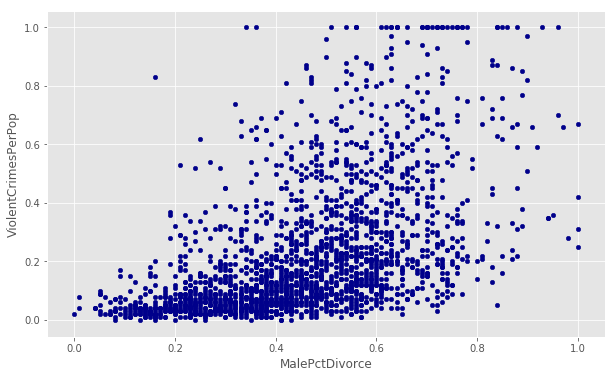

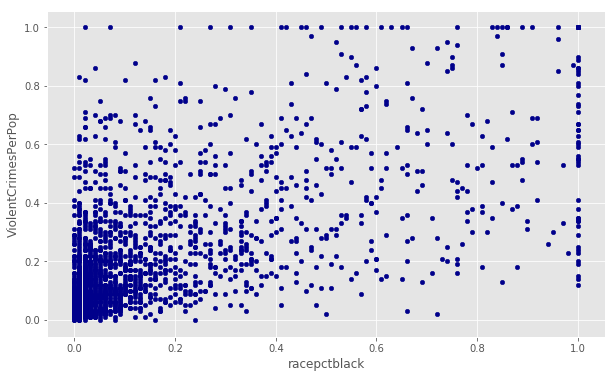

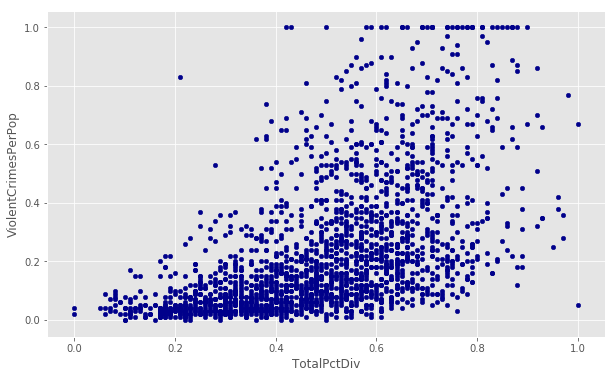

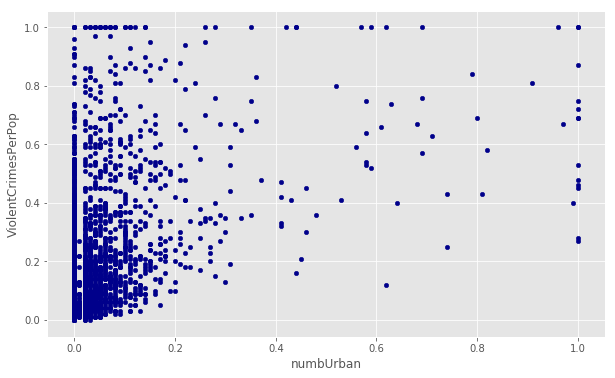

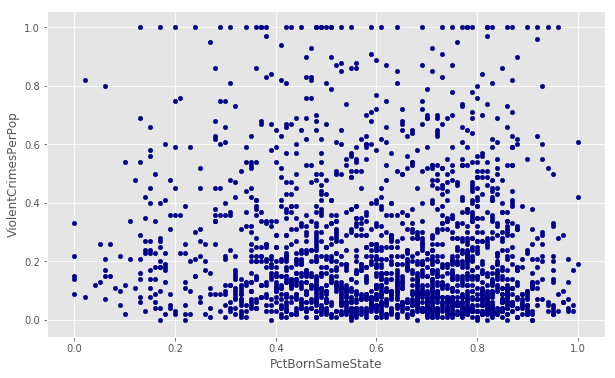

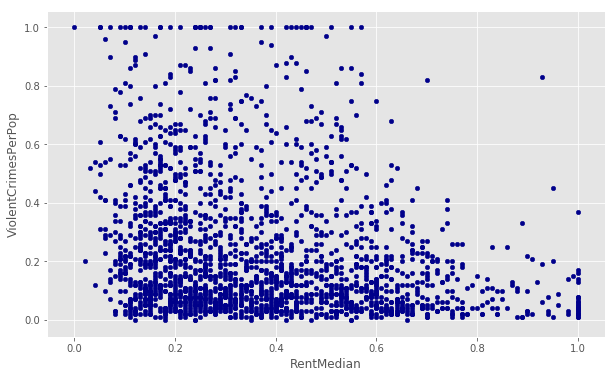

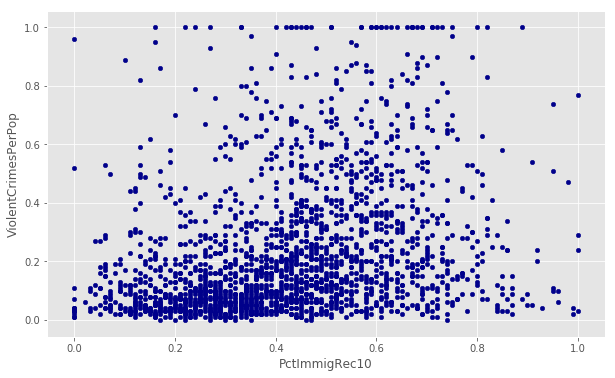

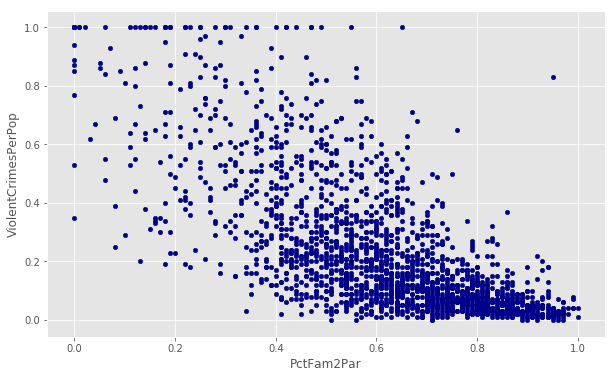

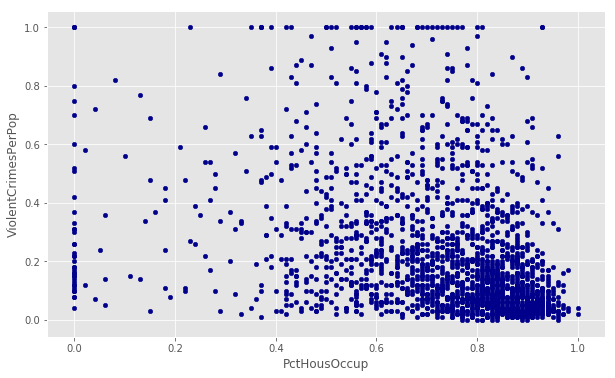

In [655]:
feature_selected = feature_df_sort.loc[feature_df_sort.importance >0.006,'feature'].to_list()
#exam each feature distribution and relationship with target value
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')
for feature in feature_selected:
    #print(feature)
    crime_cleaned.plot(kind='scatter', x=feature, y='ViolentCrimesPerPop', figsize=(10, 6), color='darkblue')

In [656]:
features = feature_selected.copy()
print(features)
print(len(features))
y = np.asarray(crime_cleaned['ViolentCrimesPerPop'])
X = np.asarray(crime_cleaned[features])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=rng)
#print("Parameter optimization")
xgb_model = xgb.XGBRegressor(objective='reg:gamma')
clf = GridSearchCV(xgb_model,{'max_depth': [2,4,6,7,8,9,10,11,12],'n_estimators': [50,100,150,200]}, verbose=1)
clf.fit(X_train,y_train)
print(clf.best_score_)
print(clf.best_params_)


['PctKids2Par', 'PctIlleg', 'racePctWhite', 'NumImmig', 'PctPersDenseHous', 'FemalePctDiv', 'NumIlleg', 'PctPopUnderPov', 'HousVacant', 'PctLargHouseFam', 'pctWInvInc', 'medIncome', 'PctImmigRec5', 'MalePctDivorce', 'racepctblack', 'TotalPctDiv', 'numbUrban', 'PctBornSameState', 'RentMedian', 'PctImmigRec10', 'PctFam2Par', 'PctHousOccup']
22
Fitting 3 folds for each of 36 candidates, totalling 108 fits


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.6550880897725444
{'max_depth': 4, 'n_estimators': 50}


[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:   35.0s finished


In [657]:
best_model = xgb.XGBRegressor(max_depth= 4,learning_rate= 0.1,n_estimators = 50,objective='reg:gamma')
best_model.fit(X_train,y_train)
yhat = best_model.predict(X_test)
print("R2-score: %.2f" % r2_score(yhat , y_test) )

R2-score: 0.51


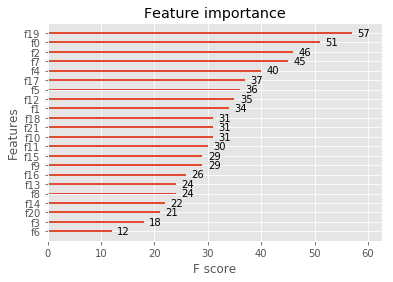

In [658]:
plot_importance(best_model)